In [1]:
import sys, os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
sys.path.append("../")

In [3]:
from Transformers import ChannelsFirst, ToTensor, Rescale, Cut

In [4]:
from DataSets import UNetDatasetFromFolders

In [5]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
data_dir = DATA_DIR_DEEPTHOUGHT

In [10]:
root_folder = os.path.join(data_dir, "dataset")

In [7]:
composed = transforms.Compose([Cut(), Rescale(.25), ChannelsFirst(), ToTensor()])

In [8]:
from UNet_torch_like_keras import UNet, dice_loss

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
complete_dataset = UNetDatasetFromFolders(root_folder, transform=composed)

In [14]:
len(complete_dataset)

9000

In [16]:
data_loader = DataLoader(complete_dataset, batch_size=16, shuffle=True, num_workers=4)

In [18]:
for i, test_batch in enumerate(data_loader):
    print(i, test_batch['image'].shape, test_batch['mask'].shape)
    if i==4:
        break

0 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
1 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
2 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
3 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
4 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])


In [19]:
model_inference = UNet()

In [20]:
model_inference.load_state_dict(torch.load("../model/trained_UNet_pytorch_keras-like_100epochs.pkl"))

<All keys matched successfully>

In [21]:
model_inference.eval()

UNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_bloc

In [22]:
model_inference.to(device)

UNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_bloc

In [23]:
import matplotlib.pyplot as plt

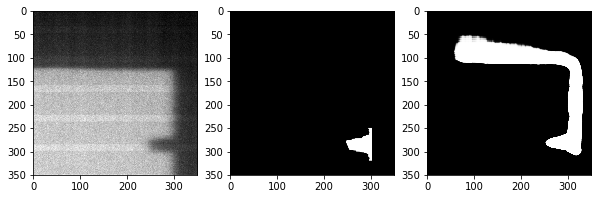

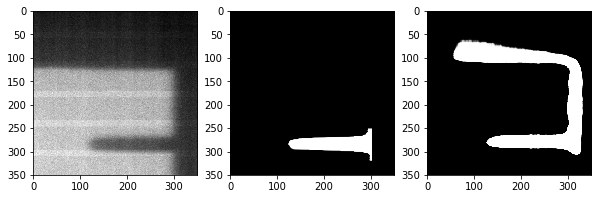

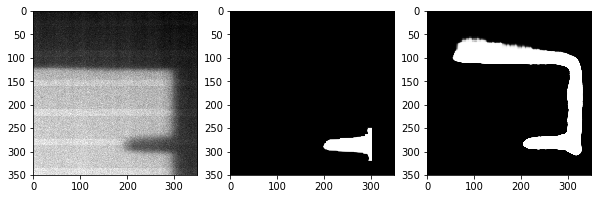

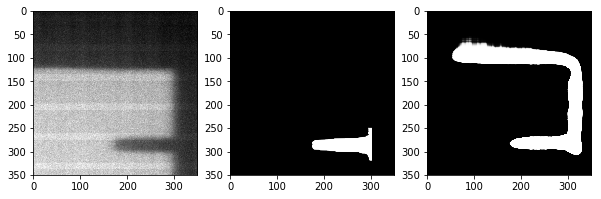

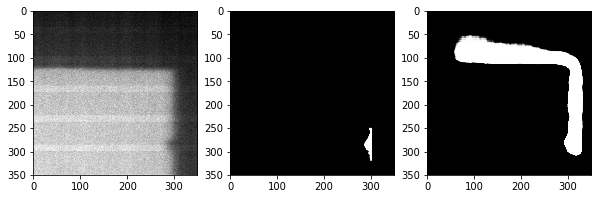

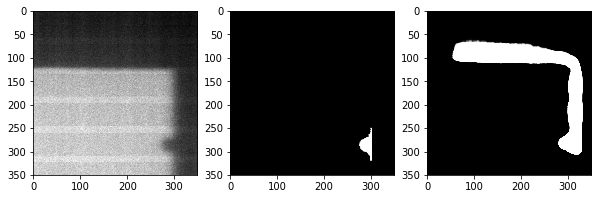

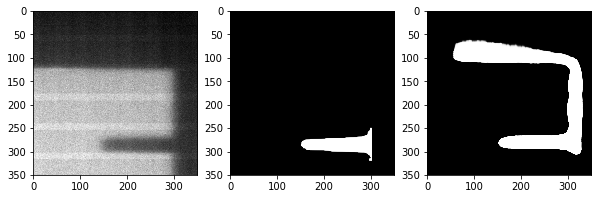

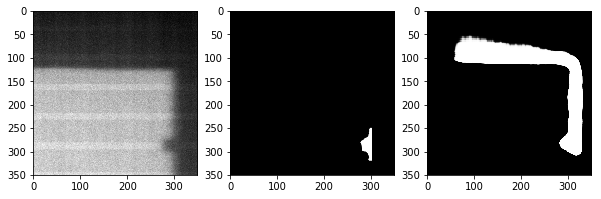

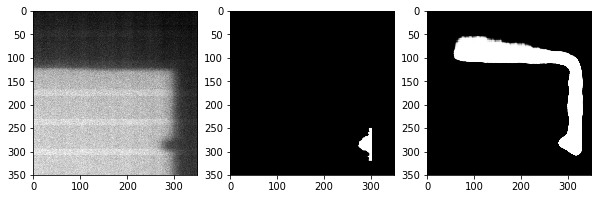

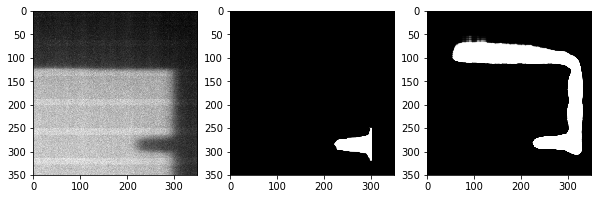

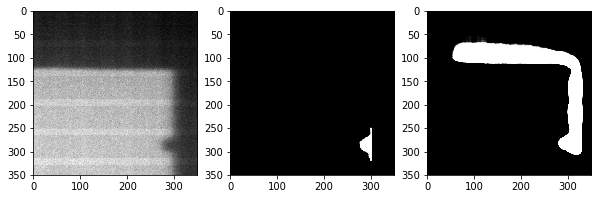

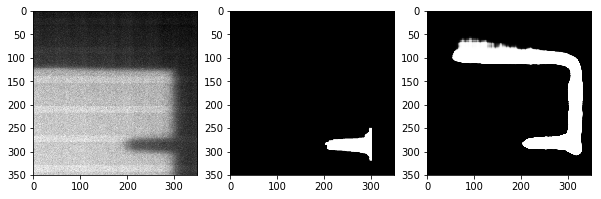

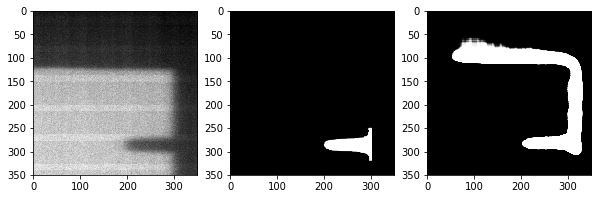

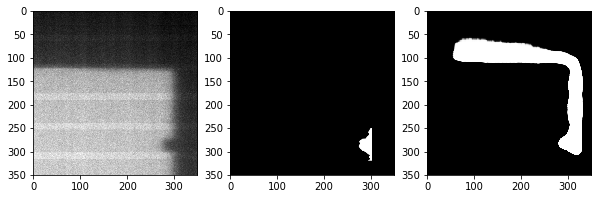

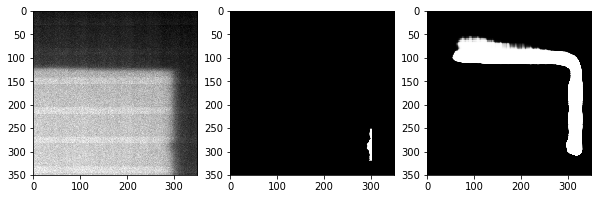

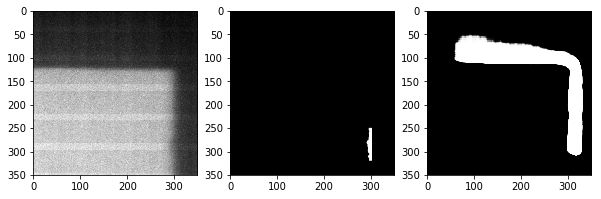

IndexError: index 16 is out of bounds for dimension 0 with size 16

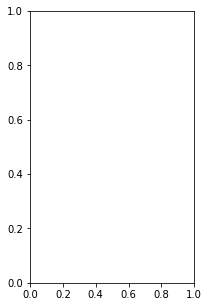

In [24]:
for i, batch in enumerate(data_loader):
    test_image, test_mask = batch['image'], batch['mask']
    pred = model_inference(test_image.float().to(device))
    f = plt.figure(figsize=(10,5))
    f.add_subplot(1,3, 1)
    plt.imshow(test_image[i][0,...], cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(test_mask[i][0,...], cmap='gray')
    f.add_subplot(1,3, 3)
    plt.imshow(pred[i][0,...].cpu().detach().numpy(), cmap='gray')
    plt.show(block=True)

In [17]:
torch.cuda.empty_cache() 

In [14]:
from matplotlib.image import imread

In [15]:
img_4leaves = imread(os.path.join(data_dir, "File_0_four.tiff"))

In [18]:
COL_SLICE = slice(1000, None)

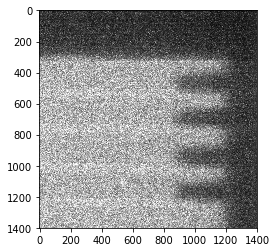

In [19]:
plt.imshow(img_4leaves[200:1600,COL_SLICE], cmap='gray')

In [21]:
img_4_arr = img_4leaves[200:1600,COL_SLICE]

In [29]:
from skimage.transform import rescale

In [45]:
resc = rescale(img_4_arr, 0.25)

In [55]:
ch_first = resc[np.newaxis, np.newaxis, ...]

In [56]:
img_4_tensor = torch.from_numpy(ch_first)

In [57]:
img_4_tensor.size()

torch.Size([1, 1, 350, 350])

In [59]:
pred = model_inference(img_4_tensor.float().to(device))

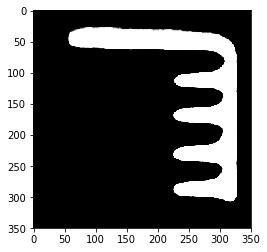

In [62]:
plt.imshow(pred[0,0,...].cpu().detach().numpy(), cmap='gray')